In [23]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import threading
import os
import cPickle as pickle
import logging
import pprint
import glob
import collections
import struct
import json
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', level=logging.INFO)


In [3]:
logging.info('abc')

07/20/2017 10:39:31 AM INFO: abc


In [4]:
locales=sorted([u'en', u'ja', u'de', u'fr', u'zh', u'ru', u'es'])
locale_map={v:u for u,v in enumerate(locales)}
locale_map

{u'de': 0, u'en': 1, u'es': 2, u'fr': 3, u'ja': 4, u'ru': 5, u'zh': 6}

In [5]:
access_map={u'all-access':0, u'mobile-web':1, u'desktop':2}
agent_map={u'all-agents':0, u'spider':1}
access_map,agent_map

({u'all-access': 0, u'desktop': 2, u'mobile-web': 1},
 {u'all-agents': 0, u'spider': 1})

In [6]:
def f_map(series, data_map):
    lst=[]
    keys=list(data_map.keys())
    for k in keys:
        lst.append(series.map(lambda u: (u==k)*1))
    df=pd.concat(lst,axis=1)
    df.columns=[series.name+"_"+u for u in keys]
    return df

In [7]:
def make_data():
    import pandas as pd
    csv_path="../input/newtrain_1.csv"
    data = pd.read_csv(csv_path, nrows=None)
    datecols=[u for u in data.columns if u.startswith("20")]
    daily_data=data[datecols].values.astype(np.float32)
    attrib_data=pd.concat([f_map(data.locale,locale_map),
                           f_map(data.agent,agent_map),
                           f_map(data.access,access_map)],axis=1).values.astype(np.float32)    
    print daily_data.shape,attrib_data.shape
    return daily_data,attrib_data

In [8]:
daily_data,attrib_data=make_data()

(145063, 550) (145063, 12)


In [38]:
def sample_row():
    row=daily_data[int(np.random.random()*(len(daily_data)))]
    i=int(np.random.random()*(len(row)-60))
    x=row[i:i+60]
    return x

In [46]:
def f():
    def f_(x,m):
        d=np.abs(x-m)
        x=np.abs(x)
        m=np.abs(m)
        return 2*d/(x+m+1e-8)
    lst=[]
    for _ in range(100000):
        x=sample_row()
        m=np.median(x)
        lst.append(np.mean(f_(x,m)))
    return np.array(lst)

In [47]:
t=f()

In [48]:
t.mean(),t[t>0].mean()

(0.33843595, 0.35819012)

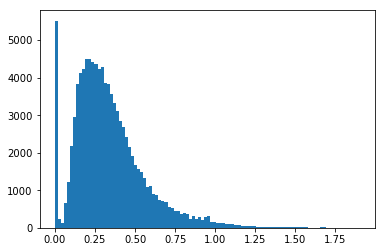

In [49]:
plt.hist(t,bins=100);